In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [8]:
model_path = "/data/models/ma-fl-mia/federated/20230424-221925"

In [9]:
import pandas as pd
history = pd.read_csv(os.path.join(model_path,"log_history.csv"))

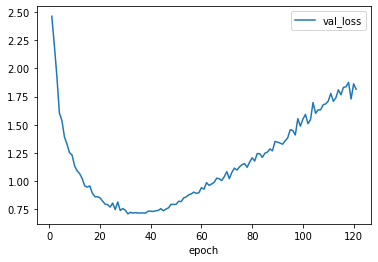

In [14]:
history.plot(x='epoch',y="val_loss")
plt.show()

In [29]:
history[history['epoch']==10]['val_loss'].iloc[0]

1.1342425346374512

In [16]:
import json
with open(os.path.join(model_path, "all_model_results.json")) as f:
    res = json.load(f)

In [33]:
r = []
for k,v in res.items():
    try:
        epoch = k.split("_")[-1]
        int(epoch)
        print(epoch)
        a = {}
        a["epoch"] = int(epoch)
        a["test_acc"] = v['global']['test_acc']
        a["train_acc"] = v['global']['train_acc']
        ta_agg = 0
        adv_agg = 0
        for i in [0,1,2]:
            ta_agg += v["local"][i]["train_acc"]
            adv_agg += v["local"][i]["adv_std"]
        ta_agg = ta_agg / 3
        adv_agg = adv_agg / 3
        a["train_acc_9000_63"] = ta_agg
        a["adv_std_9000_63"] = adv_agg
        
        ta_agg = 0
        adv_agg = 0
        for i in [3,4]:
            ta_agg += v["local"][i]["train_acc"]
            adv_agg += v["local"][i]["adv_std"]
        ta_agg = ta_agg / 2
        adv_agg = adv_agg / 2
        a["train_acc_9000_48"] = ta_agg
        a["adv_std_9000_48"] = adv_agg
 
        ta_agg = 0
        adv_agg = 0
        for i in [5,6,7]:
            ta_agg += v["local"][i]["train_acc"]
            adv_agg += v["local"][i]["adv_std"]
        ta_agg = ta_agg / 3
        adv_agg = adv_agg / 3
        a["train_acc_1000_63"] = ta_agg
        a["adv_std_1000_63"] = adv_agg

        ta_agg = 0
        adv_agg = 0
        for i in [8,9]:
            ta_agg += v["local"][i]["train_acc"]
            adv_agg += v["local"][i]["adv_std"]
        ta_agg = ta_agg / 2
        adv_agg = adv_agg / 2
        a["train_acc_1000_48"] = ta_agg
        a["adv_std_1000_48"] = adv_agg
        
        r.append(a)
    except:
        pass
r = pd.DataFrame(r)
r

100
90
30
120
50
40
60
20
110
10
70
80


,epoch,test_acc,train_acc,train_acc_9000_63,adv_std_9000_63,train_acc_9000_48,adv_std_9000_48,train_acc_1000_63,adv_std_1000_63,train_acc_1000_48,adv_std_1000_48
0,100,0.7761,0.95558,0.999889,25.348148,0.892389,12.016667,0.999000,22.966667,0.8610,5.70
1,90,0.7715,0.95268,0.999667,27.977778,0.885944,11.844444,0.997333,24.766667,0.8520,5.75
2,30,0.7440,0.83338,0.862074,11.448148,0.793667,4.677778,0.852000,8.400000,0.7755,2.05
3,120,0.7752,0.95740,1.000000,24.633333,0.897333,12.894444,0.999000,22.300000,0.8605,6.95
4,50,0.7682,0.92796,0.979778,25.048148,0.853889,7.705556,0.970667,21.800000,0.8310,3.15
5,40,0.7649,0.89156,0.933370,18.081481,0.831444,6.022222,0.928667,15.633333,0.8125,3.40
6,60,0.7716,0.94358,0.994259,28.629630,0.870667,9.283333,0.991333,24.500000,0.8440,3.45
7,20,0.7104,0.75000,0.763259,5.133333,0.730889,2.272222,0.758000,1.466667,0.7310,0.10
8,110,0.7692,0.95556,0.999926,25.659259,0.892833,12.666667,0.998000,22.900000,0.8575,6.65
9,10,0.6059,0.61840,0.624704,1.729630,0.609444,0.861111,0.609667,-2.533333,0.6270,-1.55


<AxesSubplot:xlabel='epoch'>

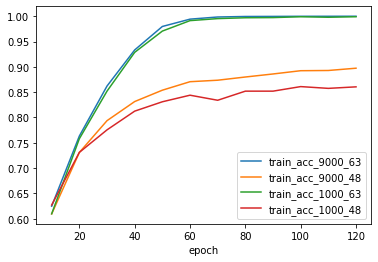

In [36]:
r.sort_values("epoch").plot(x="epoch", y=['train_acc_9000_63', 'train_acc_9000_48', 'train_acc_1000_63', 'train_acc_1000_48'])

<AxesSubplot:xlabel='epoch'>

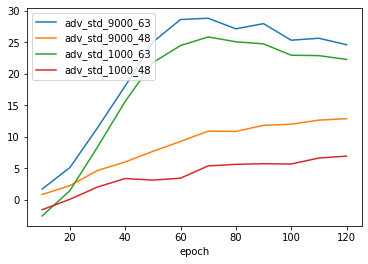

In [37]:
r.sort_values("epoch").plot(x="epoch", y=['adv_std_9000_63', 'adv_std_9000_48', 'adv_std_1000_63', 'adv_std_1000_48'])